In [1]:
import keras
keras.__version__

/home/ubuntu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


'2.1.6'

In [2]:
import numpy as np
from keras.datasets import reuters

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer

max_words = 1000

In [29]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words,
                                                         test_split=0.2)
num_classes = np.max(y_train) + 1

tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [30]:
model = Sequential()
model.add(Dense(512, input_shape=(max_words,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=10,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/10
8083/8083 [==============================] - 5s 633us/step - loss: 1.4299 - acc: 0.6771 - val_loss: 1.0867 - val_acc: 0.7608
Epoch 2/10
8083/8083 [==============================] - 5s 580us/step - loss: 0.7878 - acc: 0.8184 - val_loss: 0.9404 - val_acc: 0.7864
Epoch 3/10
8083/8083 [==============================] - 4s 533us/step - loss: 0.5488 - acc: 0.8663 - val_loss: 0.8894 - val_acc: 0.7920
Epoch 4/10
8083/8083 [==============================] - 5s 595us/step - loss: 0.4152 - acc: 0.8995 - val_loss: 0.8814 - val_acc: 0.8087
Epoch 5/10
8083/8083 [==============================] - 4s 471us/step - loss: 0.3288 - acc: 0.9162 - val_loss: 0.9059 - val_acc: 0.7998
Epoch 6/10
8083/8083 [==============================] - 4s 539us/step - loss: 0.2812 - acc: 0.9306 - val_loss: 0.9176 - val_acc: 0.8109
Epoch 7/10
8083/8083 [==============================] - 4s 496us/step - loss: 0.2446 - acc: 0.9360 - val_loss: 0.9364 - val_acc: 0.8065
E

In [31]:
%matplotlib inline

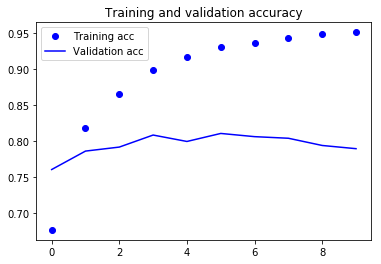

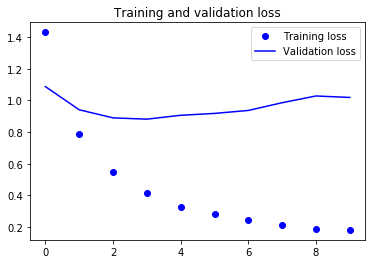

In [32]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [39]:
max_words = 10000

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words,
                                                         test_split=0.2)
num_classes = np.max(y_train) + 1

tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [40]:
model = Sequential()
model.add(Dense(512, input_shape=(max_words,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=10,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/10
8083/8083 [==============================] - 28s 3ms/step - loss: 1.3058 - acc: 0.7163 - val_loss: 0.9685 - val_acc: 0.7953
Epoch 2/10
8083/8083 [==============================] - 26s 3ms/step - loss: 0.5139 - acc: 0.8853 - val_loss: 0.8841 - val_acc: 0.8154
Epoch 3/10
8083/8083 [==============================] - 25s 3ms/step - loss: 0.2868 - acc: 0.9363 - val_loss: 0.8983 - val_acc: 0.8065
Epoch 4/10
8083/8083 [==============================] - 25s 3ms/step - loss: 0.2287 - acc: 0.9466 - val_loss: 0.9520 - val_acc: 0.8076
Epoch 5/10
8083/8083 [==============================] - 25s 3ms/step - loss: 0.1865 - acc: 0.9543 - val_loss: 0.9938 - val_acc: 0.7976
Epoch 6/10
8083/8083 [==============================] - 25s 3ms/step - loss: 0.2023 - acc: 0.9531 - val_loss: 0.9784 - val_acc: 0.8065
Epoch 7/10
8083/8083 [==============================] - 25s 3ms/step - loss: 0.1852 - acc: 0.9561 - val_loss: 1.0547 - val_acc: 0.7998
Epoch 8/

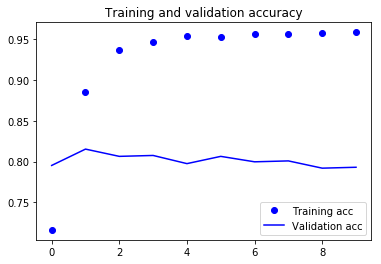

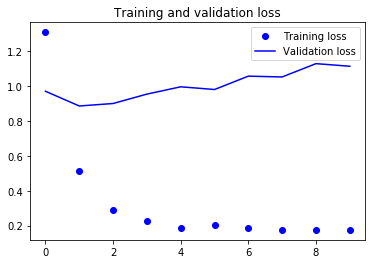

In [41]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [47]:
max_words = 10000

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words,
                                                         test_split=0.2)
num_classes = np.max(y_train) + 1

tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [48]:
model = Sequential()
model.add(Dense(512, input_shape=(max_words,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=10,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/10
8083/8083 [==============================] - 30s 4ms/step - loss: 1.4560 - acc: 0.6699 - val_loss: 1.1138 - val_acc: 0.7586
Epoch 2/10
8083/8083 [==============================] - 29s 4ms/step - loss: 0.7887 - acc: 0.8202 - val_loss: 0.9549 - val_acc: 0.7842
Epoch 3/10
8083/8083 [==============================] - 29s 4ms/step - loss: 0.4906 - acc: 0.8827 - val_loss: 0.9661 - val_acc: 0.8087
Epoch 4/10
8083/8083 [==============================] - 31s 4ms/step - loss: 0.3646 - acc: 0.9159 - val_loss: 0.9916 - val_acc: 0.7953
Epoch 5/10
8083/8083 [==============================] - 29s 4ms/step - loss: 0.2861 - acc: 0.9320 - val_loss: 0.9830 - val_acc: 0.8142
Epoch 6/10
8083/8083 [==============================] - 29s 4ms/step - loss: 0.2632 - acc: 0.9414 - val_loss: 0.9987 - val_acc: 0.8120
Epoch 7/10
8083/8083 [==============================] - 29s 4ms/step - loss: 0.2437 - acc: 0.9472 - val_loss: 1.0380 - val_acc: 0.8087
Epoch 8/

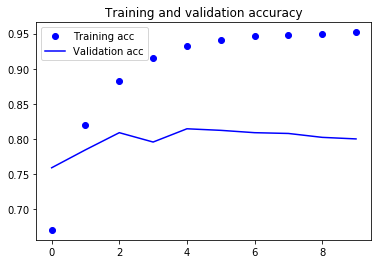

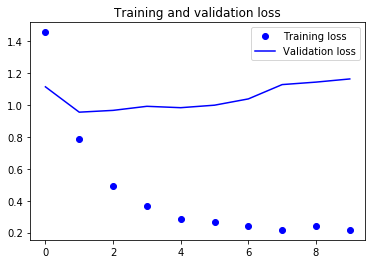

In [49]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [50]:
model = Sequential()
model.add(Dense(512, input_shape=(max_words,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/10
8083/8083 [==============================] - 13s 2ms/step - loss: 1.3762 - acc: 0.6856 - val_loss: 1.1789 - val_acc: 0.7353
Epoch 2/10
8083/8083 [==============================] - 12s 1ms/step - loss: 0.6343 - acc: 0.8576 - val_loss: 0.9872 - val_acc: 0.7942
Epoch 3/10
8083/8083 [==============================] - 12s 2ms/step - loss: 0.3545 - acc: 0.9186 - val_loss: 0.9871 - val_acc: 0.8020
Epoch 4/10
8083/8083 [==============================] - 13s 2ms/step - loss: 0.2471 - acc: 0.9420 - val_loss: 1.1216 - val_acc: 0.7920
Epoch 5/10
8083/8083 [==============================] - 12s 2ms/step - loss: 0.2089 - acc: 0.9508 - val_loss: 1.2405 - val_acc: 0.7786
Epoch 6/10
8083/8083 [==============================] - 13s 2ms/step - loss: 0.1774 - acc: 0.9537 - val_loss: 1.2507 - val_acc: 0.7942
Epoch 7/10
8083/8083 [==============================] - 12s 2ms/step - loss: 0.1630 - acc: 0.9542 - val_loss: 1.3192 - val_acc: 0.7887
Epoch 8/

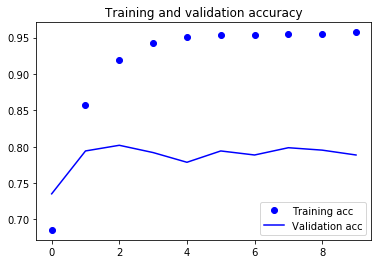

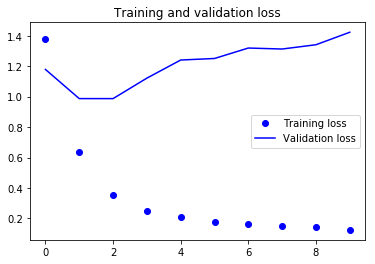

In [51]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [52]:
model = Sequential()
model.add(Dense(512, input_shape=(max_words,), activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=10,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/10
8083/8083 [==============================] - 25s 3ms/step - loss: 1.3702 - acc: 0.6915 - val_loss: 1.0999 - val_acc: 0.7753
Epoch 2/10
8083/8083 [==============================] - 23s 3ms/step - loss: 0.7761 - acc: 0.8236 - val_loss: 0.9490 - val_acc: 0.7920
Epoch 3/10
8083/8083 [==============================] - 23s 3ms/step - loss: 0.5503 - acc: 0.8755 - val_loss: 0.9537 - val_acc: 0.8109
Epoch 4/10
8083/8083 [==============================] - 23s 3ms/step - loss: 0.4259 - acc: 0.9062 - val_loss: 1.0650 - val_acc: 0.7976
Epoch 5/10
8083/8083 [==============================] - 24s 3ms/step - loss: 0.3447 - acc: 0.9226 - val_loss: 1.0823 - val_acc: 0.8031
Epoch 6/10
8083/8083 [==============================] - 24s 3ms/step - loss: 0.3022 - acc: 0.9325 - val_loss: 1.1253 - val_acc: 0.8042
Epoch 7/10
8083/8083 [==============================] - 24s 3ms/step - loss: 0.2713 - acc: 0.9381 - val_loss: 1.1210 - val_acc: 0.8042
Epoch 8/

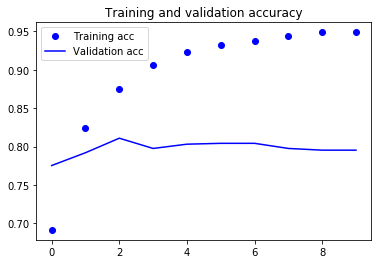

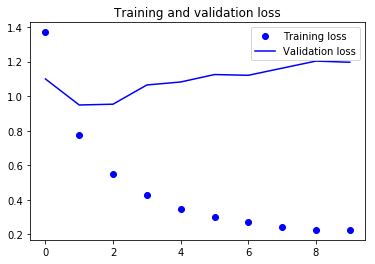

In [53]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()